In [1]:
using DifferentialEquations
using ModelingToolkit
using LinearAlgebra
using Plots
using Colors
using Images
using Statistics
using Sundials

In [9]:
# Parameters and Initial Conditions

#initial conditions
A = 100


#paramaters 
a = 10
b = .001
c = 10
d = 10
tau = 60

p = [a,b,c,d, tau];

In [10]:
# ODEs
function rhosim(du,u,h,p,t)
    hist = h(p, t - p[5])[1]
    du[1] = p[1]*(u[1]/(u[1]+p[3]))  -  p[2]*u[1]*hist
   end

rhosim (generic function with 1 method)

In [11]:
h(p, t) = ones(3)*100
lags = [tau]
alg = MethodOfSteps(Tsit5())

MethodOfSteps{Tsit5{typeof(OrdinaryDiffEq.trivial_limiter!), typeof(OrdinaryDiffEq.trivial_limiter!), Static.False}, NLFunctional{Rational{Int64}, Rational{Int64}}, false}(Tsit5(; stage_limiter! = trivial_limiter!, step_limiter! = trivial_limiter!, thread = static(false),), NLFunctional{Rational{Int64}, Rational{Int64}}(1//100, 1//5, 10))

In [12]:
# Simulation 
u0 = [A]
tspan = (0.0,600.0)

prob = DDEProblem(rhosim,u0, h,tspan,p, constant_lags = lags)
sol = solve(prob, alg)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 46-element Vector{Float64}:
   0.0
   0.2560232496078817
   2.6331338792670484
   7.243674108230883
  12.97965694334897
  20.332045043675212
  29.280878044032523
  40.28218273403998
  53.659320402259574
  60.0
   ⋮
 436.8534881347813
 455.53122607854095
 482.10221526258414
 499.9302337366288
 522.7245967926153
 546.6977136550523
 570.8081791857517
 591.7118101558051
 600.0
u: 46-element Vector{Vector{Float64}}:
 [100.0]
 [99.76996319332216]
 [97.87311051943617]
 [95.18474395750786]
 [93.0871814938938]
 [91.59034470587879]
 [90.71014092365971]
 [90.26385777885596]
 [90.07934520349616]
 [90.0448407641003]
 ⋮
 [94.40120565933155]
 [90.944117303706]
 [90.97817592427893]
 [94.14965696609234]
 [98.84781649381698]
 [100.01892627447243]
 [96.0675031453221]
 [91.7953192194051]
 [90.7240971642903]

┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


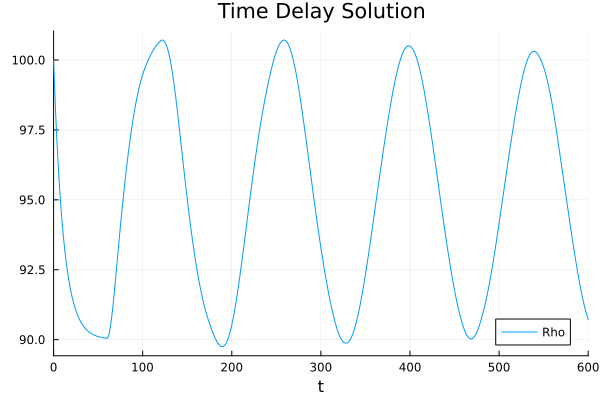

In [6]:
plot(sol,vars=([1]), title="Time Delay Solution", labels=["Rho" "PakGEF"])

In [8]:
# Generate the constants
N = 100
Ax = Array(Tridiagonal([1.0 for i in 1:N-1],[-2.0 for i in 1:N],[1.0 for i in 1:N-1]))
Ay = copy(Ax)
Ax[1,end] = 1.0
Ax[end,1] = 1.0
Ay[1,end] = 1.0
Ay[end,1] = 1.0
Ax = Ax*100 # because scale of domain 
Ay = Ay*100

r0 = zeros(100,100,3)
r0[:,:,1] .= 0.2.*(rand.() .+1)
r0[:,:,2] .= 0.8.*(rand.() .+1)

# Dummy parameters used only locally in fxn but passed to specify scope, or something..
Ayt = zeros(N,N)
Ayd = zeros(N,N)
tAx = zeros(N,N)
dAx = zeros(N,N)
Dt = zeros(N,N)
Dd = zeros(N,N)
R1 = zeros(N,N)

100×100 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮              ⋱            ⋮                   
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

In [9]:
function yeast_fast!(dr,r,h,p,t)
  Ka, Ki, Kh, D1, Ayt, tAx, Dt, R1,tau = p
  hist = h(p, t - tau;idxs = 1)
  rhoT = @view r[:,:,1]
  rhoD = @view r[:,:,2]
  rhoD .= mean(rhoD)

  dgtp = @view dr[:,:,1]
  dgdp = @view dr[:,:,2]
  mul!(Ayt,Ay,rhoT)
  mul!(tAx,rhoT,Ax)
  @. Dt = D1*(Ayt + tAx)
  @. R1 = Ka*(rhoT/(Kh+rhoT))*rhoT*rhoD - Ki*rhoT*hist
  # @. R1 = K1*rhoT^2*rhoD - K2*rhoT*pak1
  # Alternative nonlinear pos feedback
  @. dgtp = Dt + R1
  @. dgdp = - R1
  end

yeast_fast! (generic function with 1 method)

In [10]:
tau=100
h(p, t; idxs = nothing) = typeof(idxs) <: Number ? 1.0 : ones(100,100,3)
lags = [tau]
alg = MethodOfSteps(Tsit5())
p = (10,.1,10,0.005,Ayt,tAx,Dt,R1,tau)
# p = (10,0.1,0.005,Ayt,tAx,Dt,R1)
# params for alt pos fb equation
yf = DDEProblem(yeast_fast!,r0, h, (0.0,1000),p,constant_lags = lags)
sol_yf = solve(yf,alg,saveat=10)

retcode: Success
Interpolation: 1st order linear
t: 101-element Vector{Float64}:
    0.0
   10.0
   20.0
   30.0
   40.0
   50.0
   60.0
   70.0
   80.0
   90.0
    ⋮
  920.0
  930.0
  940.0
  950.0
  960.0
  970.0
  980.0
  990.0
 1000.0
u: 101-element Vector{Array{Float64, 3}}:
 [0.35904946325660736 0.39097377203718625 … 0.3856227236906522 0.3891156301883409; 0.3765793384817996 0.36590024546792566 … 0.24608840267678922 0.21683344240624694; … ; 0.2690599190965573 0.2776212990293551 … 0.23788936772983238 0.2981516192405924; 0.20264894119524446 0.30441534548183724 … 0.2621137930500629 0.27934392161235494;;; 1.2524956803292246 1.2579400506450984 … 0.9492217206309621 1.5568020235379998; 0.956239537967472 1.1837792402116514 … 0.8525855780826511 1.481405992125344; … ; 1.2043237547954027 1.1367360125631536 … 1.2041282705016643 1.3204963425851233; 1.0467437147394392 1.2310088171381492 … 1.0143351141112242 1.274873397211351;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.

In [11]:
# p = (50,5.0,0.005,Ayt,tAx,Dt,R1)
# Increasing off rate results in smaller and more concentrated patch.

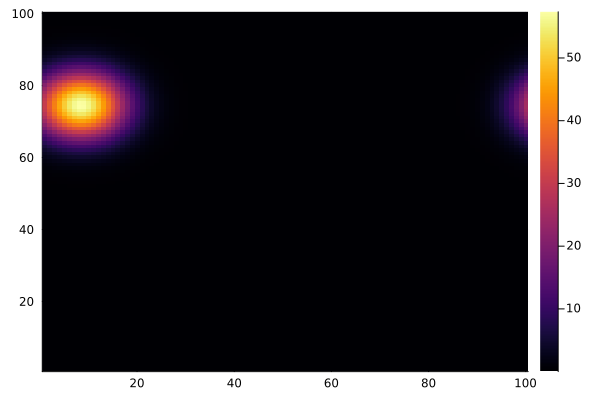

In [12]:
Plots.heatmap(sol_yf[:,:,1,end])

┌ Info: Saved animation to /home/dionsaur/Downloads/yeast_1sp_delay.gif
└ @ Plots /home/dionsaur/.julia/packages/Plots/ju9dp/src/animation.jl:156


Plots.AnimatedGif("/home/dionsaur/Downloads/yeast_1sp_delay.gif")
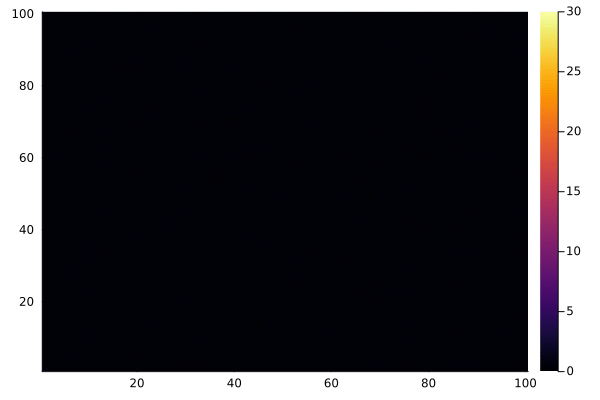

In [13]:
anim = @animate for i in 1:60
    Plots.heatmap(sol_yf[:,:,1,i],clim=(0,30))
end
gif(anim, "yeast_1sp_delay.gif", fps=60)
#gif(anim, "yeast_fast_alt.gif", fps=60)